In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Load in the Heart Failure DataSet

In [2]:
heart_data = pd.read_csv("heart_failure_clinical_records.csv")
pd.set_option('display.max_columns', None) 
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


##### Overview About the Data

In [3]:
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


##### Questions we might want to ask

1. Of the patients who passed away or experienced death, how many of them were smokers?
2. What percentage of people who had diabetes died and was younger than 60 years old?
3. What percentage of survivors had high blood pressure? how many of them were women vs men? 

In [5]:
total_survivors = sum(heart_data.DEATH_EVENT==0)
total_deaths = sum(heart_data.DEATH_EVENT==1)
total_dead_smokers = sum((heart_data.DEATH_EVENT==1) & (heart_data.smoking==1))
under60_diabetic_deaths = sum((heart_data.diabetes==1) & (heart_data.age < 60) & (heart_data.DEATH_EVENT==1))
total_diabetic_deaths = sum((heart_data.diabetes==1) & (heart_data.DEATH_EVENT==1))
hbp_survivors = sum((heart_data.high_blood_pressure==1) & (heart_data.DEATH_EVENT==1)) #hbp = high blood pressure
hbp_survivors_F = sum((heart_data.high_blood_pressure==1) & (heart_data.sex==0) & (heart_data.DEATH_EVENT==1))
hbp_survivors_M = sum((heart_data.high_blood_pressure==1) & (heart_data.sex==1) & (heart_data.DEATH_EVENT==1))

**Taking the total number of patients who died due to heart failure who also indicated that they were smokers:**

In [6]:
print(f'The total amount of patients who died and are smokers is: {total_dead_smokers}')

The total amount of patients who died and are smokers is: 499


**Taking the total number of patients who died, had diabetes and were under the age of 60**

In [7]:
print(f'The total number of patients who died, had diabetes and was under the age of 60: {under60_diabetic_deaths}')
perc_under60_diab_deaths = ((under60_diabetic_deaths)/(total_diabetic_deaths))
print(f'The total percentage of people with diabtes who died and was under the age of 60: {perc_under60_diab_deaths*100:.2f}%')

The total number of patients who died, had diabetes and was under the age of 60: 233
The total percentage of people with diabtes who died and was under the age of 60: 34.47%


**Taking the total number of survivors who had high blood pressure, and then figuring out how many where M or F**

In [8]:
# Confirming that the total high blood pressure survivors total out to the amount of F + M hbp survivors
print(hbp_survivors)
print(hbp_survivors_F)
print(hbp_survivors_M)

677
269
408


In [9]:
# Percentage of survivors who had high blood pressure
perc_surv_with_hbp = (hbp_survivors)/(total_survivors)
perc_surv_with_hbp_M = (hbp_survivors_M)/(total_survivors)
perc_surv_with_hbp_F = (hbp_survivors_F)/(total_survivors)
print(f'The total percentage of survivors who have high blood pressure: {perc_surv_with_hbp*100:.2f}%')
print(f'The total percentage of survivors who have high blood pressure:and were Men {perc_surv_with_hbp_M*100:.2f}%')
print(f'The total percentage of survivors who have high blood pressure and were Women: {perc_surv_with_hbp_F*100:.2f}%')


The total percentage of survivors who have high blood pressure: 19.73%
The total percentage of survivors who have high blood pressure:and were Men 11.89%
The total percentage of survivors who have high blood pressure and were Women: 7.84%


##### Exploratory Visualizations

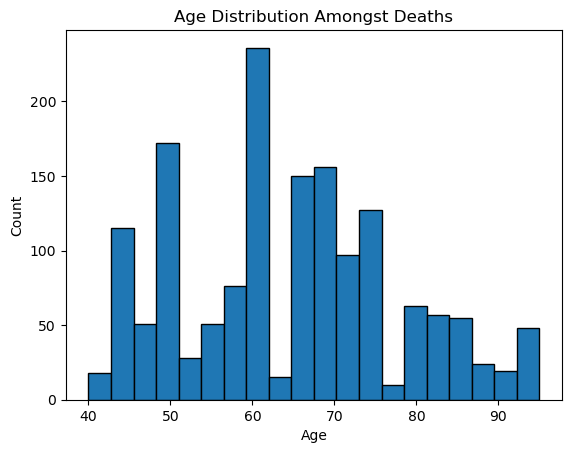

In [10]:
dead_patients = heart_data[heart_data['DEATH_EVENT']==1]
# dead_patients.head()

plt.hist(dead_patients['age'], bins=20, edgecolor= 'black')
plt.xlabel ('Age')
plt.ylabel ('Count')
plt.title ('Age Distribution Amongst Deaths')
plt.show()

**^We can see that folks within their mid 50s and mid 70s experienced the most death due to heart failure. This is common and indicates that we can look into ways where could leverage this information to take more preventative actions.**

-------------------------

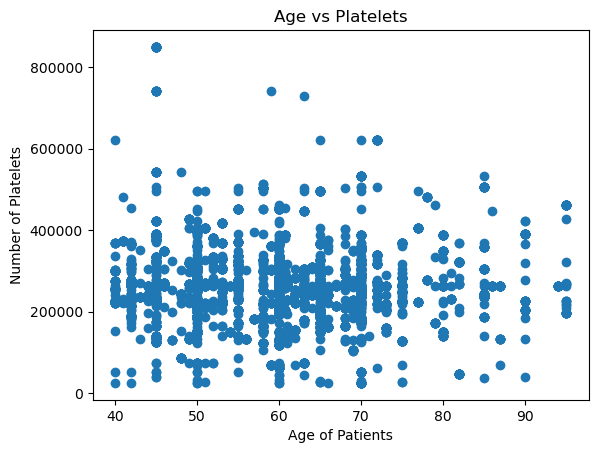

In [11]:
plt.scatter(heart_data['age'], heart_data['platelets'])
plt.xlabel ('Age of Patients')
plt.ylabel('Number of Platelets')
plt.title ('Age vs Platelets')
plt.show()

**^Typically the higher number of platelets a person has, the higher their chances of getting blood clots. Anywhere between 350-400k is when that it becomes a red flag and we can see that in our data as well. The higher this count the higher your chances of experiencing heart failure.**

-----------------------

age                         0.249442
anaemia                     0.054508
creatinine_phosphokinase    0.079706
diabetes                   -0.011273
ejection_fraction          -0.292702
high_blood_pressure         0.094023
platelets                  -0.031521
serum_creatinine            0.311281
serum_sodium               -0.227355
sex                         0.055604
smoking                     0.009397
time                       -0.527234
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64


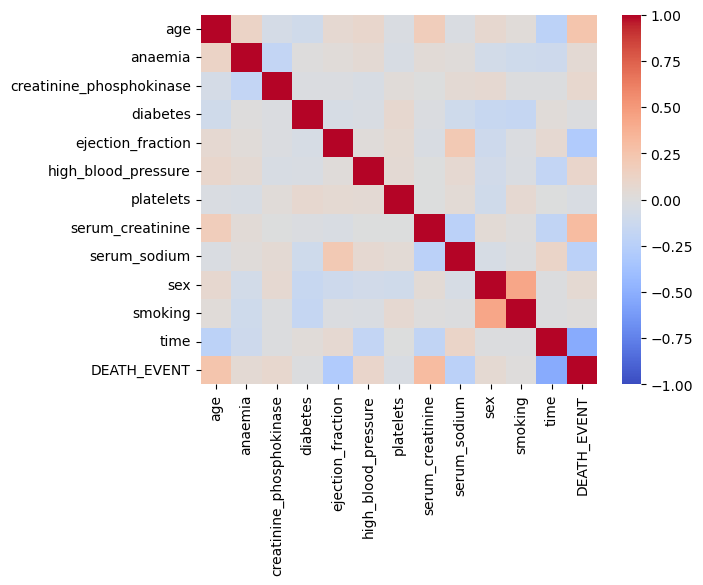

In [12]:
#Creating correlation data amongst the different categories within the heart failure data
corr = heart_data.corr()
sns.heatmap(corr, cmap='coolwarm',vmin=-1, vmax=1)
print(corr['DEATH_EVENT'])

**^Although we see a ton of positive correlations, when looking at the correlations specifically for death events, these positive correlations are on the weaker side. Higher levels of serum creatine does show a moderate correlation of about 31% which could indicate within our data it has the highest correlation to death. This makes sense because according to research, high levels of this can lead to kidney failure.**

------------------------

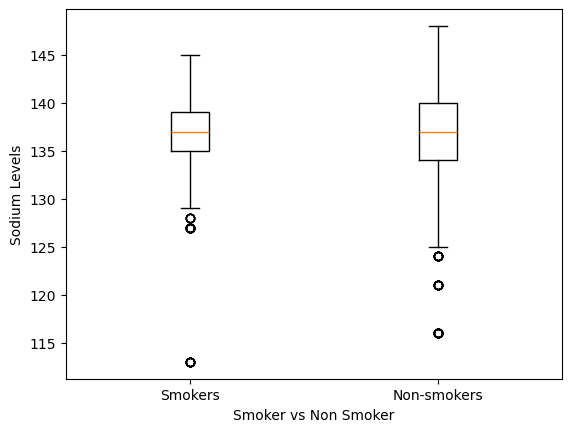

In [21]:
smokedata = heart_data[heart_data['smoking']==1]['serum_sodium']
non_smokedata = heart_data[heart_data['smoking']==0]['serum_sodium']
plt.boxplot([smokedata,non_smokedata], labels=['Smokers','Non-smokers'])
plt.xlabel('Smoker vs Non Smoker')
plt.ylabel ('Sodium Levels')
plt.show()

****^According to some research by online publications, a sodium level of above 145 is very dangerous and we can see that they have similar medians. But we can also see that non-smokers have outliers above 145 which would be very different from popular opinion.**

-------------

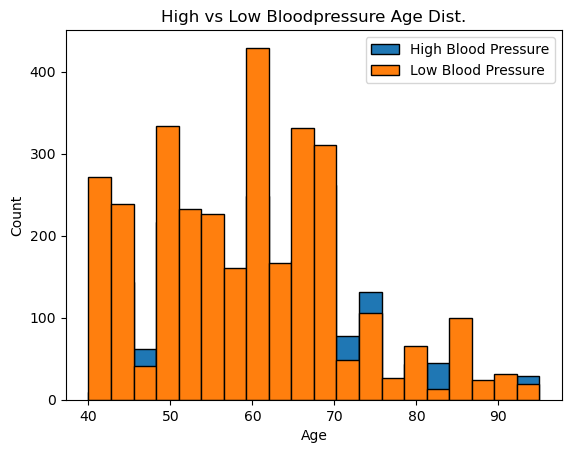

In [26]:
highblood_yes = heart_data[heart_data['high_blood_pressure']==1]['age']
highblood_no = heart_data[heart_data['high_blood_pressure']==0]['age']

plt.hist(highblood_yes, bins=20, edgecolor='black', label='High Blood Pressure')
plt.hist(highblood_no, bins=20, edgecolor='black', label='Low Blood Pressure')
plt.xlabel ('Age')
plt.ylabel ('Count')
plt.title ('High vs Low Bloodpressure Age Dist.')
plt.legend()
plt.show()

**^Here we can see a few things, one is that the regardless of the age, the blood pressure tends to be low. We can also use this to come to the conclusion that blood pressure doesn't have as MUCH of an effect of heart failure. Although it may play a role, its impact is on the lower side of things**